In [43]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("austinreese/craigslist-carstrucks-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/austinreese/craigslist-carstrucks-data/versions/10


# 0. Import necessary libraries

In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# 1. Data Exploration and Pre-processing

In [45]:
# Load dataset
df = pd.read_csv('/root/.cache/kagglehub/datasets/austinreese/craigslist-carstrucks-data/versions/10/vehicles.csv')

In [46]:
# Explore the dataset
print(df.head())
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())
print(df.isnull().sum())

           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN

In [47]:
# 1.1 Handle missing values, outliers, and perform necessary data cleaning
# Keep essential features only
cols = ['price', 'year', 'manufacturer', 'odometer', 'fuel', 'condition', 'transmission']
# Handle missing values: drop rows with any missing values
df = df[cols]
df = df.dropna()
# Handle price outliers (keep prices between $1k-$100k)
df = df[(df['price'] > 1000) & (df['price'] < 100000)]
# Handle year outliers: keep reasonable car years (e.g., 1980 to 2024)
df = df[(df['year'] >= 1980) & (df['year'] <= 2024)]
# Handle odometer outliers: limit to realistic values (e.g., less than 300,000 miles)
df = df[(df['odometer'] >= 0) & (df['odometer'] <= 300000)]

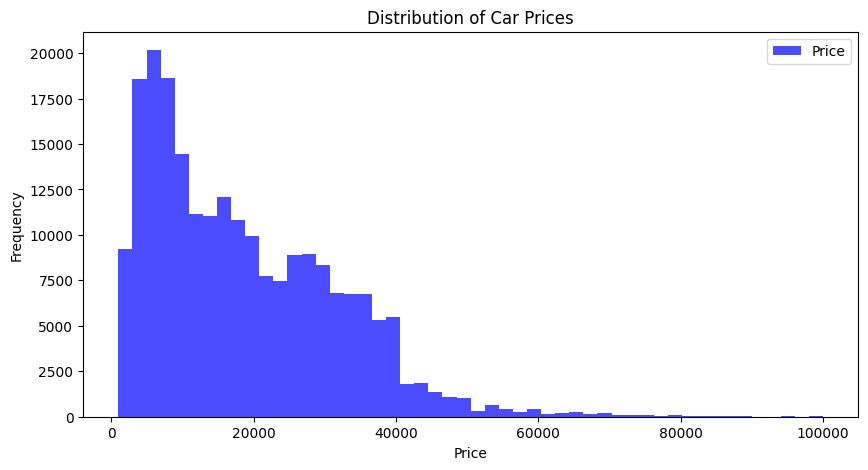

In [48]:
# 1.2 Visualize the distribution of car prices
plt.figure(figsize=(10, 5))
plt.hist(df['price'], bins=50, color='blue', alpha=0.7, label='Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.legend()
plt.show()

# 2. Feature Engineering

In [49]:
# 2.1 Extract relevant information from features
# Create a new feature for car age
df['car_age'] = 2024 - df['year']

In [50]:
# 2.2 Encode categorical variables using OneHotEncoding and scale numerical features
categorical_features = ['manufacturer', 'fuel', 'transmission', 'condition']
numerical_features = ['odometer', 'car_age']

In [51]:
# Encode categorical variables
#le = LabelEncoder()
#df['brand'] = le.fit_transform(df['brand'])
#df['model'] = le.fit_transform(df['model'])
#df['fuel'] = le.fit_transform(df['fuel'])

In [52]:
# Scale numerical features
#scaler = StandardScaler()
#numerical_features = ['mileage', 'car_age', 'fuel_efficiency']
#df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 3. Train a Linear Regression Model

In [53]:
# 3.1 Split the dataset into training and testing sets
X = df[categorical_features + numerical_features]
y = df['price']

In [54]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# 3.2 Train the linear regression model using a suitable library
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
model = LinearRegression()
model.fit(X_train_processed, y_train)

LinearRegression()

In [56]:
# Train the linear regression model using the class we wrote on the tp session
class LinearRegression_Class:

    def __init__(self, lr = 0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters # it's the number of iterations in the gradient descent algorithm to find the optimal weights and bias for the model to minimize the cost function and make accurate predictions.
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y)) # derivative of the weights : (1/n_samples) * X_transpose * (y_pred - y)
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

# 1. Preprocessing (with .toarray())
X_train_processed = preprocessor.fit_transform(X_train).toarray()
X_test_processed = preprocessor.transform(X_test).toarray()

# 2. Convert y_train to numpy array
y_train_np = y_train.values

# 3. Train Custom Model
model_class = LinearRegression_Class(lr=0.01, n_iters=1000)
model_class.fit(X_train_processed, y_train_np)  # Use numpy array here

# 4. Model Evaluation

In [57]:
# Make predictions for scikit-learn model
y_pred = model.predict(X_test_processed)

In [58]:
# 4. Make predictions for custom model
y_pred_class = model_class.predict(X_test_processed)

In [66]:
# 4.1 Evaluate the model's performance using MSE and R-squared
print("===Model Evaluation using the scikit-learn Library===")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}\n')

print("===Model Evaluation using the scikit-learn Library===")
mse = mean_squared_error(y_test, y_pred_class)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

===Model Evaluation using the scikit-learn Library===
Mean Squared Error: 63529711.82471869
R-squared: 0.6300205393264289

===Model Evaluation using the scikit-learn Library===
Mean Squared Error: 76589124.36876933
R-squared: 0.6300205393264289


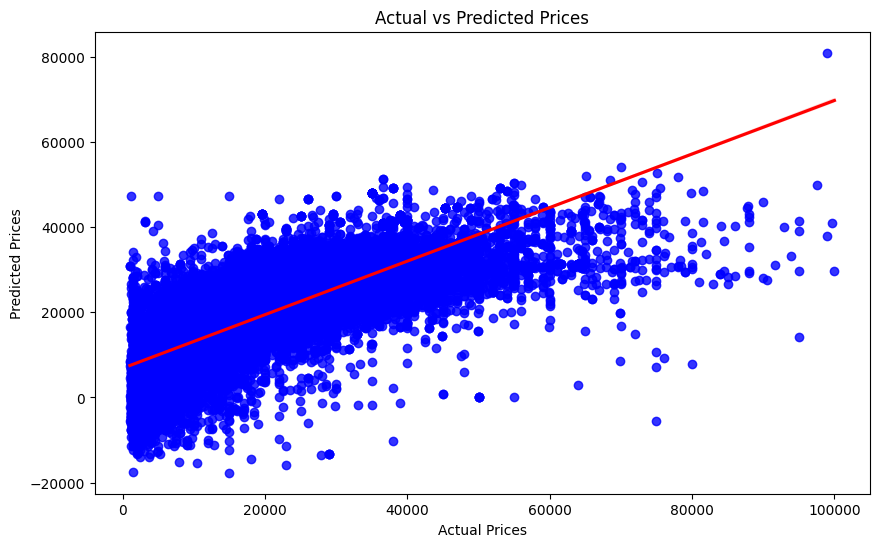

In [67]:
# 4.2 Visualize the predicted prices against the actual prices
# Plot 1: Regression plot showing the relationship between actual and predicted prices
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Plot 2: Scatter plot with a reference line (y = x) for perfect predictions
#plt.figure(figsize=(10, 5))
#plt.scatter(y_test, y_pred, alpha=0.5, color='green')
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
#plt.xlabel('Actual Prices')
#plt.ylabel('Predicted Prices')
#plt.title('Actual vs Predicted Prices')
#plt.show()


# 5. Feature Importance Analysis

In [73]:
# 5.1 Analyze the coefficients of the linear regression model
coefficients = model.coef_
feature_names = preprocessor.get_feature_names_out()
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print("Top 5 Most Impactful Features:")
print(feature_importance.head())

Top 5 Most Impactful Features:
                           Feature   Coefficient
13       cat__manufacturer_ferrari  64059.390764
4   cat__manufacturer_aston-martin  28607.283980
39         cat__manufacturer_tesla  14086.132035
43                cat__fuel_diesel  13323.404396
11        cat__manufacturer_datsun  12447.596945


# 6. Bonus: Predict New Unseen Cars

In [69]:
# 6.1 Predict prices for new, unseen cars
new_car = pd.DataFrame([{
    'manufacturer': 'toyota',
    'fuel': 'gas',
    'transmission': 'automatic',
    'condition': 'excellent',
    'odometer': 50000,
    'car_age': 5
}])


In [70]:
# Predict price
new_car_processed = preprocessor.transform(new_car)
predicted_price = model.predict(new_car_processed)
print(f"Predicted price: ${predicted_price[0]:,.2f}")

Predicted price: $26,067.73
